# Preprocessing & EDA

In [2]:
#Import Libraries
import numpy as np 
import pandas as pd 
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
#from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,precision_recall_curve,roc_curve


In [3]:
from subprocess import check_output

print(check_output(["ls", "./data"]).decode("utf8")) # This will list the files in the input directory

creditcard.csv
https-::www.kaggle.com:mlg-ulb:creditcardfraud.webloc



In [4]:
#Load & Inspect Data
df = pd.read_csv("./data/creditcard.csv")
print(list(df.columns.values))
df.head()

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
np.array(df.isnull().sum()) #no null values (see below)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
class_1 = df[df.Class==1]
class_0 = df[df.Class==0]
percent=len(class_1)/(len(class_1)+len(class_0))
print("Proportion Fraudulent     : %f" % percent)
ratio = float(len(class_1))/len(class_0)
ratio
print("Ratio of Fraud to Geniune : %f" % ratio)

Proportion Fraudulent     : 0.001727
Ratio of Fraud to Geniune : 0.001730


Text(0,0.5,'Count')

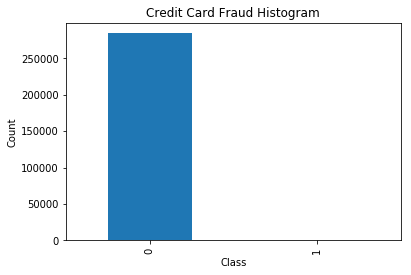

In [19]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Credit Card Fraud Histogram")
plt.xlabel("Class")
plt.ylabel("Count")

In [22]:
#Dropping AMOUNT and TIME from DF
df = df.drop(['Amount','Time'],axis=1)        #,'Time'      #NOTE: time gets dropped later either way
list(df.columns.values)

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Class',
 'normAmount']

/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/

/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
/Users/michaelwtarino/Desktop/anaconda3/

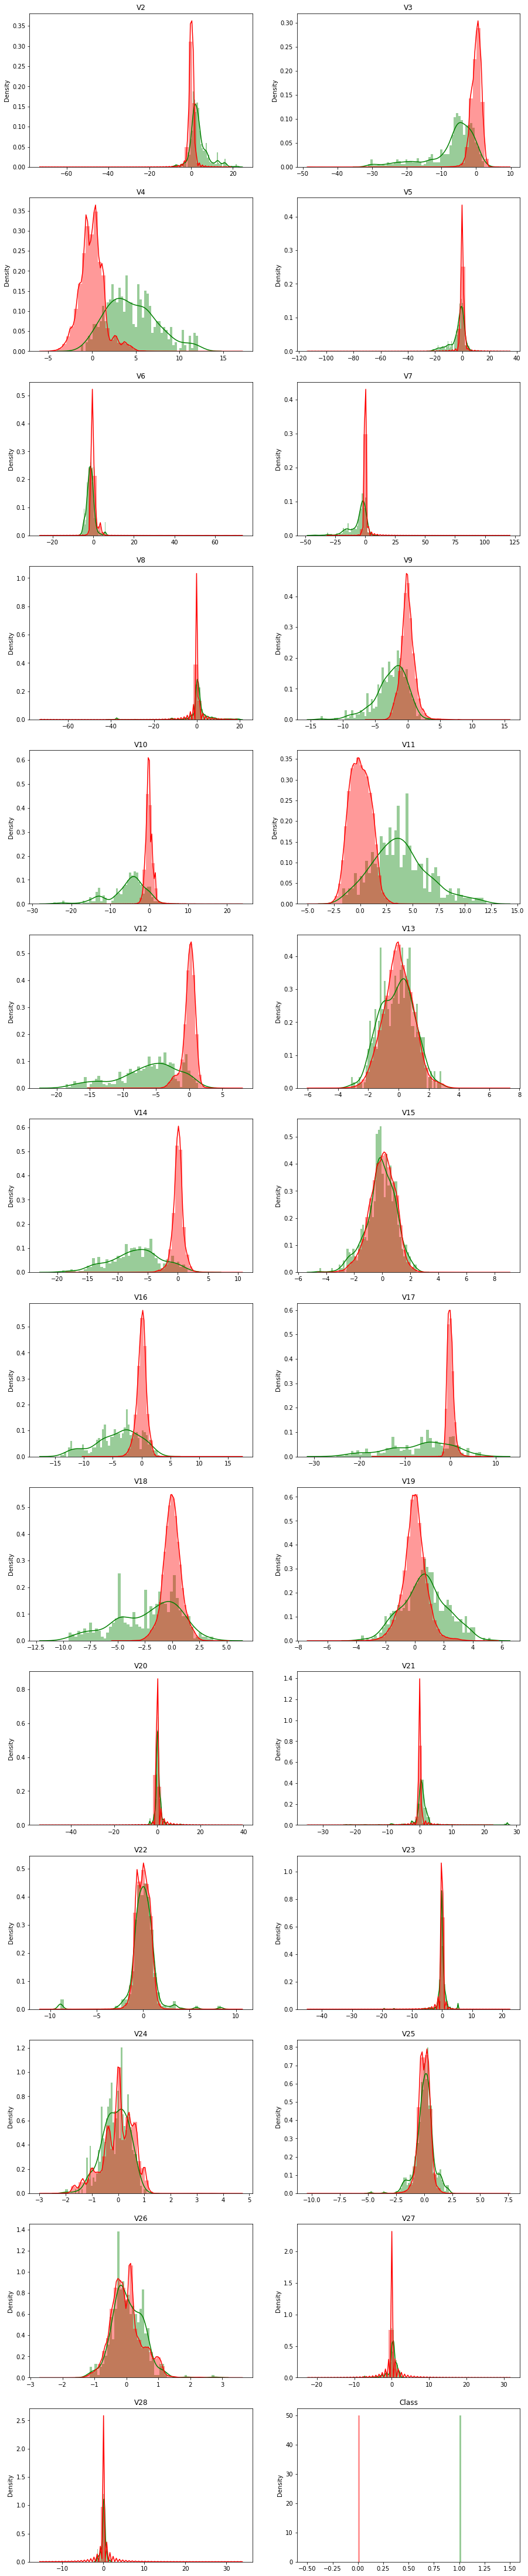

In [120]:
#Plot boxplot 
#Looking for features that diverges from normal distribuition
import matplotlib.gridspec as gridspec

columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
normals = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df[col][normals], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()


In [23]:
#Assign x and y --> note there has been no Feature Selection beyond removing Amount and Time
x = df.drop(['Class'], axis=1) #take out dependent variable 'Class'
y = df.Class

In [24]:
#Plot Confusion Matrix:
def plotConfusion(model, x, y):
    y_true, y_pred = y, model.predict(x)
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure(figsize=(5,5))
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

In [25]:
#Feature ranking with recursive feature elimination 
#and cross-validated selection of the best number of features.
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn import discriminant_analysis

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=discriminant_analysis.LinearDiscriminantAnalysis(), step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(x, y)
#recursive feature elimination example with automatic tuning of the number of features selected with cross-validation

print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 11


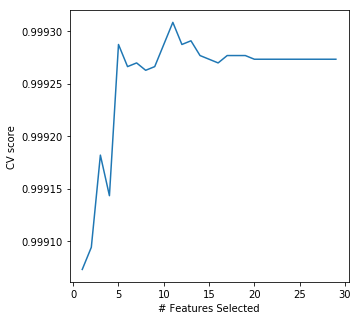

In [35]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(5,5))
plt.xlabel("# Features Selected")
plt.ylabel("CV score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

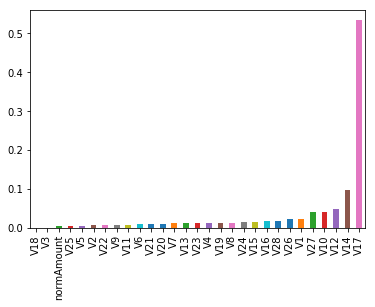

In [36]:
##Feature Importance Visualization with Decision Tree
from sklearn.tree import DecisionTreeClassifier
df_tree = DecisionTreeClassifier()
df_tree.fit(x,y)
pd.Series(index = x.columns, data = df_tree.feature_importances_).sort_values().plot(kind = 'bar')

In [32]:
#List of Selected Features
x.columns.values[rfecv.support_]  

array(['V3', 'V4', 'V7', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

# Training Data (before Resampling)

In [39]:
#from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split #model_selection is in the newer module

#80/20 Split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
print("# transactions - training: ", len(x_train))
print("# transactions - testing: ", len(x_test))
print("# transactions - total: ", len(x_train)+len(x_test))

# transactions - training:  227845
# transactions - testing:  56962
# transactions - total:  284807


In [51]:
#select features outlined above
x_train = x_train.iloc[:,rfecv.support_]
x_test = x_test.iloc[:,rfecv.support_]

IndexError: indices are out-of-bounds

In [53]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(568630, 29)
(227845, 11)
(113726, 29)
(227845,)
(113726,)


# Resampling Imbalanced Data


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
import imblearn as il
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
%matplotlib inline

#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression


In [56]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()


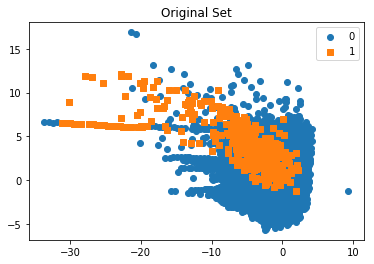

In [70]:
#plot original set
plot_2d_space(x_train.values, y_train.values, 'Original Set')  #.values to convert panda DF to np array


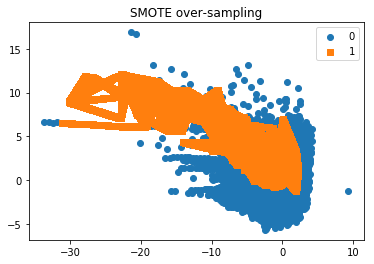

In [61]:
#Note: *we will resample on training data*

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')   #random_state=12, ratio = 'auto', kind = 'regular'
X_sm, y_sm = smote.fit_sample(x_train,y_train)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')


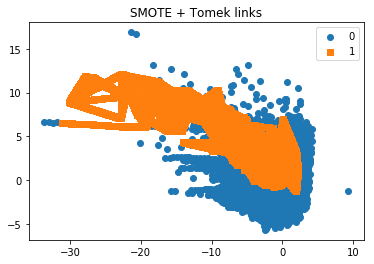

In [64]:
#Over-sampling followed by under-sampling
#Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(x_train,y_train)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')


In [72]:
X_smt

array([[ 8.00712441e-01, -1.06039825e+00, -6.14243480e-01, ...,
        -1.72092961e+00,  7.97853221e-01, -6.75939779e-03],
       [ 4.73795287e-01, -1.66380655e-01, -3.55309200e-01, ...,
         9.23461033e-01, -9.34008755e-01,  2.62930399e-01],
       [-2.86726817e-01,  1.59685187e+00, -3.03207042e-01, ...,
        -4.47184659e-01,  5.54035371e-02, -8.73888753e-01],
       ...,
       [-1.34969925e+00,  2.04945875e+00,  4.04122894e-01, ...,
         7.94692568e-01,  4.03591233e+00,  1.15268571e+00],
       [-8.07387978e+00,  5.31572699e+00, -5.84626242e+00, ...,
        -5.94333445e+00, -1.23692416e+01, -3.66586382e+00],
       [-7.97700160e+00,  6.21470947e+00, -8.57793904e+00, ...,
        -6.40491497e+00, -1.36031848e+01, -4.32965231e+00]])

In [76]:
#CONVERT RESAMPLE TRAINING DATA
x_train=pd.DataFrame(X_smt)   #convert np array back into DF
y_train=pd.DataFrame(y_smt)   #convert np array back into DF


# MODELS

# Fitting Logistic Regression model

Best parameters : {'class_weight': {0: 0.4289473684210526, 1: 0.5710526315789475}}


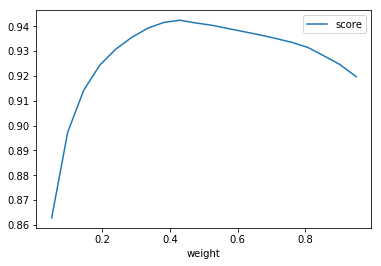

In [58]:
#from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split



#resampling for Logistic Regression
weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: w, 1: 1.0-w} for w in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(x, y)   

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')

In [80]:
import numpy as np
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
lr = LogisticRegression(**grid_result.best_params_)

# Fit..
lr.fit(x_train, y_train)

# Predict..
y_pred = lr.predict(x_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
#plot_confusion_matrix(confusion_matrix(y_test, y_pred))
confusion_matrix(y_test, y_pred)
#AUC ROC
from sklearn.metrics import confusion_matrix, roc_auc_score
roc_auc_score(y_test, y_pred)   #0.9478158315950108
# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 

             precision    recall  f1-score   support

          0       0.93      0.97      0.95     56724
          1       0.97      0.93      0.95     57002

avg / total       0.95      0.95      0.95    113726



0.9478158315950108

In [74]:
###############
#training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)


#Fitting Logistic Regression model

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
#GridSearchCV(cv=None,
 #            estimator=LogisticRegression(C=1.0, intercept_scaling=1,   
 #              dual=False, fit_intercept=True, penalty='l2', tol=0.0001),
 #            param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
#clf.fit(X_resampled2, y_resampled2)
clf.fit(x_train, y_train)              #INPUT RESAMPLED DATA****

clf.best_params_

{'C': 100}

Probability Threshold: 0.10
Recall metric: 0.80
Precision metric: 1.00
Probability Threshold: 0.20
Recall metric: 0.77
Precision metric: 1.00
Probability Threshold: 0.30
Recall metric: 0.73
Precision metric: 1.00
Probability Threshold: 0.40
Recall metric: 0.67
Precision metric: 1.00
Probability Threshold: 0.50
Recall metric: 0.63
Precision metric: 1.00
Probability Threshold: 0.60
Recall metric: 0.61
Precision metric: 1.00
Probability Threshold: 0.70
Recall metric: 0.57
Precision metric: 1.00
Probability Threshold: 0.80
Recall metric: 0.55
Precision metric: 1.00
Probability Threshold: 0.90
Recall metric: 0.52
Precision metric: 1.00


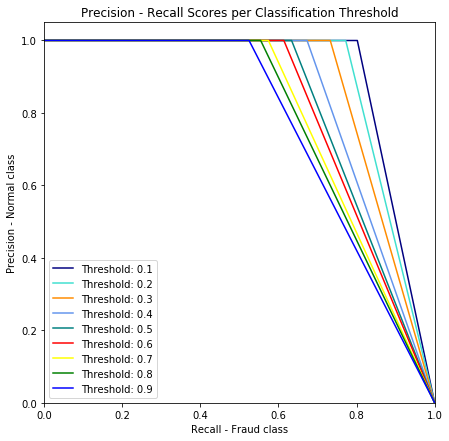

In [143]:
from itertools import cycle

#Selecting probabitiy threshold for the Logistic Regression Model Classification:

#This classification scoring is going to be examined further in order to find the opitmal point where the model can achieve not only high score in dectecting Fraud (Recall Score), but also high score in correctly classifying Normal transactions (Precision Score) due to the following aspects:
#High Fraud classification (Recall score) rate will obviously help business/bank from losing money
#High Normal classification (Precision score) rate will help improve the Customer Experience/Satisfactory
y_pred_test_proba = clf.predict_proba(x_test)

thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal', 'red', 'yellow', 'green', 'blue','black'])

prec, rec = [],[]
for i in thresholds:
    y_test_predictions_high_recall = y_pred_test_proba[:,1] > i
    
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test,y_test_predictions_high_recall)
    np.set_printoptions(precision=2)
    
    p = float(cnf_matrix[0,0])/(cnf_matrix[0,1]+cnf_matrix[0,0])
    r = float(cnf_matrix[1,1])/(cnf_matrix[1,0]+cnf_matrix[1,1])
    rec.append(r)
    prec.append(p)

    print("Probability Threshold: {0:0.2f}".format(i))
    print("Recall metric: {0:0.2f}".format(r))
    print("Precision metric: {0:0.2f}".format(p))

plt.figure(figsize=(7,7))

for i,color,r,p in zip(thresholds,colors,rec,prec):
    plt.plot([0, r, 1], [1, p, 0],color=color, label='Threshold: %s'%i)
    plt.ylabel('Precision - Normal class')
    plt.xlabel('Recall - Fraud class')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision - Recall Scores per Classification Threshold')
    plt.legend(loc="lower left")
#We will select the Optimal Threshold where it helps achieve the goal for both Recall (Fraud detection rate) score and Precision score.



In [147]:
##Evaluating the AUC of the Logistic Regression: 

from sklearn.linear_model import LogisticRegression
# Since this is an imbalanced dataset, setting class_weight='balanced' will give us a better result
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR = LogisticRegression(class_weight='balanced')
LR.fit(x_train, y_train)
y_predict = LR.predict(x_test)

from sklearn.metrics import confusion_matrix, roc_auc_score
print(confusion_matrix(y_test, y_predict))

# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 
# In this case, accuracy is not a good metric. ROC curve or F1 score works better for this task.
roc_auc_score(y_test, y_predict)   #0.9535106541729954

[[55515  1346]
 [    7    94]]


0.9535106541729954

# Gaussian Naive Bayes

#"resampling is unecessary of GNB is used; a cost-sensitive classifer;  "

In [81]:
#training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()

#Fit a Gaussian Naive Bayes model and print out its accuracy:
gnb.fit(x_train, y_train)         
print(gnb.score(x, y))


0.9152084835481772


In [ ]:
##if you want to predict the new data point x_new = [2.8, 5.6, 3.2, 6.7].
#x_new = [2.8, 56, 3.2, 6.7]            ##redefine this to be relevant to CC data (not iris data)!!!!
#x_new = np.array(x_new).reshape(1, -1)
#print("classification: {}".format(gnb.predict(x_new)))
#print("probability: {}".format(gnb.predict_proba(x_new)))

NameError: name 'pairPlot' is not defined

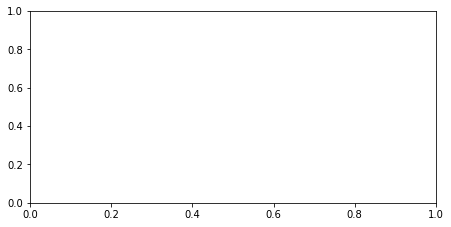

In [152]:
#visualize the decision boundary for each pair of features.
plt.rcParams['figure.figsize'] = 16, 12
plt.subplot(321)
pairPlot(gnb, 0, 1) ##  edit(gnb,0,1)  0,1 represent y-outcomes (class: default or no default)

plt.subplot(322)
pairPlot(gnb, 1, 0)

plt.show()

In [150]:
##Evaluating the AUC of the Gaussian Naive Bayes: [not yet assimilated]
y_predict = LR.predict(x_test)   #predict for GNB!

from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 
# In this case, accuracy is not a good metric. ROC curve or F1 score works better for this task.
roc_auc_score(y_test, y_predict)

0.9535106541729954

# SUPPORT VECTOR MACHINES (SVM)

In [32]:
#training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

#import libraries
from sklearn.svm import SVC

#Fitting SVM Model:
tuned_parameters = [{'kernel': ['rbf','poly'], 'gamma': [1e-3,  1e-4], 'C': [1,10,100,1000]}]
scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    svm = GridSearchCV(SVC(), tuned_parameters, cv=5,scoring='%s_macro' % score)
    svm.fit(x_train, y_train)                         ##resampled & retrained?-->necessary?

    print("Best parameters set found on Training dataset:")
    print()
    print(svm.best_params_)
    print()
    print("Grid scores on Training dataset:")
    print()
    
    # ***BELOW IS where the issue pops up...could just eliminate the rest and the plot?***
    # ***see if following line of code works***
    
    #means = svm.cv_results_['mean_test_score']   
    #stds = svm.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, svm.cv_results_['params']):
        #print("%0.3f (+/-%0.03f) for %r"
              #% (mean, std * 2, params))
    #print()

    print("Detailed classification report:")
    print()
    y_true_test_svm, y_pred_test_svm = y_test_, svm.predict(x_test_) ##???x_test_
    print(classification_report(y_true_test_svm, y_pred_test_svm))
    print()
    
plotConfusion(svm, x_test, y_test)


##AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

# Tuning hyper-parameters for precision



/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


KeyboardInterrupt: 

In [33]:
##Evaluating the AUC of the SVM: [not yet assimilated]

y_predict = LR.predict(x_test)       #predict for SVM!

from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 
# In this case, accuracy is not a good metric. ROC curve or F1 score works better for this task.
roc_auc_score(y_test, y_predict)


NameError: name 'LR' is not defined

# DECISION TREES

# RANDOM FORESTS

In [75]:
from sklearn import ensemble
randomForest = ensemble.RandomForestClassifier()
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

In [76]:
import pandas as pd
from sklearn import model_selection

#training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [77]:
randomForest.set_params(n_estimators=50, random_state=42)
randomForest.fit(x_train, y_train)      ##fit
randomForest.score(x_train, y_train)    ##accuracy
print("The training error of random forest is: %.5f" %(1 - randomForest.score(x_train, y_train)))
print("The test     error of random forest is: %.5f" %(1 - randomForest.score(x_test, y_test)))


##too many dimensions to plot?? can plot 2 independent variables as x,y (class would be the color split)
##sort and pick top 2 most important features in order to visualize it! as long as you explain
#plot_model(randomForest, <x>, <y>, y_train)  
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()


##why no resampled x_train_resample?????

The training error of random forest is: 0.00000
The test     error of random forest is: 0.00011


In [78]:
#Feature Importance

#first, need to combine X_train and y_train because I separated these variables before training
train = pd.concat([x_train,y_train])

##Feature Importance
feature_importance = list(zip(train.columns[:-2], randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
feature_sort

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [ ]:
#OOB-Score
#oob-score is the out of bag score, which is also used to evaluate the model.
#After fitting on the bootstrap sample, it make predictions on the rest of the data set(out of the bootstrap sample).
#We can not control the numbers of observations in the out of bag sample.
#We need to set oob-score=true manually when fit the model:

randomForest.set_params(oob_score=True, random_state=42)
randomForest.fit(x_train, y_train)

In [ ]:
##Grid Search
#As for decision tree, we also need to decide several parameters by grid search. It might take longer for this one.
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(x_train, y_train)

In [ ]:
grid_search_forest.best_params_

In [ ]:
grid_search_forest.best_score_

print("The training error is: %.5f" % (1 - grid_search_forest.score(x_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.score(x_test, y_test)))

In [30]:
#Plot
##Number of Trees
n_trees_range = range(30, 500, 10)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    randomForest.set_params(n_estimators=n_trees, random_state=42, oob_score=True)
    randomForest.fit(x_train, y_train)
    train_error2.append(1 - randomForest.score(x_train, y_train))
    test_error2.append(1 - randomForest.score(x_test, y_test))
    oob_error.append(1 - randomForest.oob_score_)
    
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.plot(n_trees_range, oob_error, c='pink', label='oob error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

KeyboardInterrupt: 

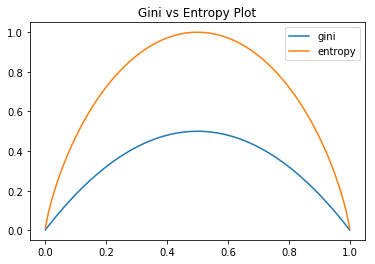

<Figure size 432x288 with 0 Axes>

In [89]:
#Generic Gini / Entropy Plot
import math

x = np.linspace(start=.001, stop=.999, num=100)  # math.log won't accept 0 or 1
y1 = list(map(lambda i: 2 * i * (1 - i), x))
y2 = list(map(lambda t: -t * math.log(t, 2) - (1 - t) * math.log((1 - t), 2), x))

fig=plt.plot(x, y1, label='gini')
plt.plot(x, y2, label='entropy')
plt.legend(loc=1)
plt.title('Gini vs Entropy Plot')
plt.show()

#plt.savefig('gini.png')

In [110]:
##Calculate AUC of RF:  [not yet assimilated]
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
rf.fit(x_train, y_train)
y_predict = rf.predict(x_test)

confusion_matrix(y_test, y_predict)
roc_auc_score(y_test, y_predict)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x1028aa9c0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/michaelwtarino/Desktop/anaconda3/lib/pyth...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/micha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x1028aa9c0, file "/Use...3.6/site-packages/ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/michaelwtarino/Desktop/anaconda3/lib/pyth...ges/__pycache__/ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': '/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...b/python3.6/site-packages/ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/micha.../python3.6/site-packages/ipykernel/kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    122         except (RuntimeError, AssertionError):
    123             old_loop = None
    124         try:
    125             self._setup_logging()
    126             asyncio.set_event_loop(self.asyncio_loop)
--> 127             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Uni...EventLoop running=True closed=False debug=False>>
    128         finally:
    129             asyncio.set_event_loop(old_loop)
    130 
    131     def stop(self):

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/asyncio/base_events.py in run_forever(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
    417             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    418                                    finalizer=self._asyncgen_finalizer_hook)
    419         try:
    420             events._set_running_loop(self)
    421             while True:
--> 422                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_UnixS...EventLoop running=True closed=False debug=False>>
    423                 if self._stopping:
    424                     break
    425         finally:
    426             self._stopping = False

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/asyncio/base_events.py in _run_once(self=<_UnixSelectorEventLoop running=True closed=False debug=False>)
   1427                         logger.warning('Executing %s took %.3f seconds',
   1428                                        _format_handle(handle), dt)
   1429                 finally:
   1430                     self._current_handle = None
   1431             else:
-> 1432                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(15, 1)>>
   1433         handle = None  # Needed to break cycles when an exception occurs.
   1434 
   1435     def _set_coroutine_wrapper(self, enabled):
   1436         try:

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/asyncio/events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(15, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (15, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=15, events=1)
    112             self.writers.remove(fd)
    113         del self.handlers[fd]
    114 
    115     def _handle_events(self, fd, events):
    116         fileobj, handler_func = self.handlers[fd]
--> 117         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    118 
    119     def start(self):
    120         try:
    121             old_loop = asyncio.get_event_loop()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 19, 23, 33, 59, 654742, tzinfo=tzutc()), 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'session': '7b8ccce3c49841ddaf1eb53b9eac4d89', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'7b8ccce3c49841ddaf1eb53b9eac4d89']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 19, 23, 33, 59, 654742, tzinfo=tzutc()), 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'session': '7b8ccce3c49841ddaf1eb53b9eac4d89', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'7b8ccce3c49841ddaf1eb53b9eac4d89'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 19, 23, 33, 59, 654742, tzinfo=tzutc()), 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'session': '7b8ccce3c49841ddaf1eb53b9eac4d89', 'username': 'username', 'version': '5.2'}, 'metadata': {}, 'msg_id': '6e72054b3f124250928e16fa03eb59f6', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = '##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='##Calculate AUC of RF:  [not yet assimilated]\nfr...test, y_predict)\nroc_auc_score(y_test, y_predict)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Assign object>, <_ast.Expr object>, <_ast.Expr object>], cell_name='<ipython-input-110-036740f16ef3>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 10e78b550, execution_...rue silent=False shell_futures=True> result=None>)
   2898 
   2899         try:
   2900             for i, node in enumerate(to_run_exec):
   2901                 mod = ast.Module([node])
   2902                 code = compiler(mod, cell_name, "exec")
-> 2903                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a2995a390, file "<ipython-input-110-036740f16ef3>", line 4>
        result = <ExecutionResult object at 10e78b550, execution_...rue silent=False shell_futures=True> result=None>
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a2995a390, file "<ipython-input-110-036740f16ef3>", line 4>, result=<ExecutionResult object at 10e78b550, execution_...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a2995a390, file "<ipython-input-110-036740f16ef3>", line 4>
        self.user_global_ns = {'All': <class 'strawberryfields.ops.All'>, 'BSgate': <class 'strawberryfields.ops.BSgate'>, 'BaseFockState': <class 'strawberryfields.backends.states.BaseFockState'>, 'BaseGaussianState': <class 'strawberryfields.backends.states.BaseGaussianState'>, 'BayesSearchCV': <class 'skopt.searchcv.BayesSearchCV'>, 'CKgate': <class 'strawberryfields.ops.CKgate'>, 'CXgate': <class 'strawberryfields.ops.CXgate'>, 'CZgate': <class 'strawberryfields.ops.CZgate'>, 'Catstate': <class 'strawberryfields.ops.Catstate'>, 'Channel': <class 'strawberryfields.ops.Channel'>, ...}
        self.user_ns = {'All': <class 'strawberryfields.ops.All'>, 'BSgate': <class 'strawberryfields.ops.BSgate'>, 'BaseFockState': <class 'strawberryfields.backends.states.BaseFockState'>, 'BaseGaussianState': <class 'strawberryfields.backends.states.BaseGaussianState'>, 'BayesSearchCV': <class 'skopt.searchcv.BayesSearchCV'>, 'CKgate': <class 'strawberryfields.ops.CKgate'>, 'CXgate': <class 'strawberryfields.ops.CXgate'>, 'CZgate': <class 'strawberryfields.ops.CZgate'>, 'Catstate': <class 'strawberryfields.ops.Catstate'>, 'Channel': <class 'strawberryfields.ops.Channel'>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
/Users/michaelwtarino/Desktop/Mike/Bootcamp/Capstone_Project/<ipython-input-110-036740f16ef3> in <module>()
      1 ##Calculate AUC of RF:  [not yet assimilated]
      2 from sklearn.ensemble import RandomForestClassifier
      3 rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
----> 4 rf.fit(X_train, y_train)
      5 y_predict = rf.predict(X_test)
      6 
      7 confusion_matrix(y_test, y_predict)
      8 roc_auc_score(y_test, y_predict)

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), X=array([[-0.6342783 , -1.0678321 ,  0.82841724, ....        0.07005012,  0.406407  ]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([0.50085951, 0.50085951, 0.50085951, ..., 0.50085951, 0.50085951,
       0.50085951]))
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 999
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Wed Sep 19 19:34:00 2018
PID: 80368 Python 3.6.5: /Users/michaelwtarino/Desktop/anaconda3/bin/python
...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1802029050, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), array([[-0.6342783 , -1.0678321 ,  0.82841724, ....        0.07005012,  0.406407  ]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([0.50085951, 0.50085951, 0.50085951, ..., 0.50085951, 0.50085951,
       0.50085951]), 0, 1000), {'class_weight': 'balanced', 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1802029050, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), array([[-0.6342783 , -1.0678321 ,  0.82841724, ....        0.07005012,  0.406407  ]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), array([0.50085951, 0.50085951, 0.50085951, ..., 0.50085951, 0.50085951,
       0.50085951]), 0, 1000)
        kwargs = {'class_weight': 'balanced', 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1802029050, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...  random_state=None, verbose=0, warm_start=False), X=array([[-0.6342783 , -1.0678321 ,  0.82841724, ....        0.07005012,  0.406407  ]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([0.50085951, 0.50085951, 0.50085951, ..., 0.50085951, 0.50085951,
       0.50085951]), tree_idx=0, n_trees=1000, verbose=0, class_weight='balanced')
    107         else:
    108             curr_sample_weight = sample_weight.copy()
    109 
    110         indices = _generate_sample_indices(tree.random_state, n_samples)
    111         sample_counts = np.bincount(indices, minlength=n_samples)
--> 112         curr_sample_weight *= sample_counts
        curr_sample_weight = array([0.50085951, 0.50085951, 0.50085951, ..., 0.50085951, 0.50085951,
       0.50085951])
        sample_counts = array([2, 0, 3, ..., 2, 0, 2])
    113 
    114         if class_weight == 'subsample':
    115             with warnings.catch_warnings():
    116                 warnings.simplefilter('ignore', DeprecationWarning)

ValueError: operands could not be broadcast together with shapes (227845,) (182276,) (227845,) 
___________________________________________________________________________

# XGBoost

In [24]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#training data
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

# import packages
print(__doc__)
import xgboost
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

# randomize the class-based datasets
#class0 = class_0.sample(frac=1)
#class1 = class_1.sample(frac=1)

# undersample majority class due to class imbalance before training - train
#class0train = class0.iloc[0:6000]
#class1train = class1
# combine subset of different classes into one balaced dataframe
#train = class0train.append(class1train, ignore_index=True).values
# split data into X and y
#X = train[:,0:30].astype(float)
#Y = train[:,30]

# XGBoost CV model
model = XGBClassifier()
kfold = StratifiedKFold(n_splits=10, random_state=7)
# use area under the precision-recall curve to show classification accuracy
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring = scoring)
print("AUC: %.3f (%.3f)" % (results.mean(), results.std()))          #AUC: 0.980 (0.021)

Automatically created module for IPython interactive environment
AUC: 0.980 (0.021)


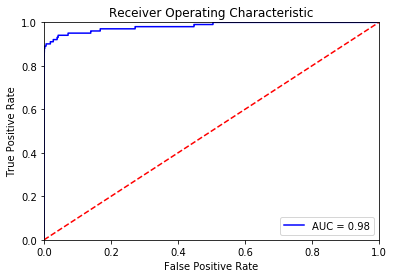

In [43]:
##reference for plotting
import xgboost as xgb
import sklearn.metrics

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = sklearn.metrics.roc_curve(y_test, preds) #<y_test, y_pred>
roc_auc = sklearn.metrics.auc(fpr, tpr)  #<True Positive Rate, False Positive Rate>

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#how to save model...?
#Average the prediction and save to the submission file

#output = pd.DataFrame({'id': id_test, 'target': preds})


# Bayesian Optimization - WIP

In [62]:
import lightgbm as lgb


/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:45: FutureWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS will be built by the Apple Clang compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you won't need to install the gcc compiler anymore.
Instead of that, you'll need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", FutureWarning)


In [64]:
#Example 1: xgBoost Parameter Tuning with Scikit-Optimize
import pandas as pd
import lightgbm as lgb    #this took a while to set up...need associated packages set up first
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from skopt import BayesSearchCV
from sklearn.model_selection import StratifiedKFold

# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 10 # 1000
TRAINING_SIZE = 100000 # 20000000
TEST_SIZE = 25000

#train data??:

/Users/michaelwtarino/Desktop/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [65]:
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (0, 10),
        'max_depth': (0, 50),
        'max_delta_step': (0, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'colsample_bylevel': (0.01, 1.0, 'uniform'),
        'reg_lambda': (1e-9, 1000, 'log-uniform'),
        'reg_alpha': (1e-9, 1.0, 'log-uniform'),
        'gamma': (1e-9, 0.5, 'log-uniform'),
        'min_child_weight': (0, 5),
        'n_estimators': (50, 100),
        'scale_pos_weight': (1e-6, 500, 'log-uniform')
    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

def status_print(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")


In [67]:
#Finally, let the parameter tuning run and wait for good results

# Fit the model
result = bayes_cv_tuner.fit(x.values, y.values, callback=status_print)  #function defined above


[18:12:35] Tree method is selected to be 'approx'
[18:12:35] Tree method is selected to be 'approx'
[18:12:35] Tree method is selected to be 'approx'
Model #1
Best ROC-AUC: 0.9289
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 0.13031389926541354, 'learning_rate': 0.042815319280763466, 'max_delta_step': 13, 'max_depth': 21, 'min_child_weight': 2, 'n_estimators': 87, 'reg_alpha': 5.497557739289786e-07, 'reg_lambda': 0.05936070635912049, 'scale_pos_weight': 0.060830282487222144, 'subsample': 0.13556548021189216}

[18:12:49] Tree method is selected to be 'approx'
[18:12:49] Tree method is selected to be 'approx'
[18:12:49] Tree method is selected to be 'approx'
Model #2
Best ROC-AUC: 0.979
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 4.358684608480795e-07, 'learning_rate': 0.7988179462781242, 'max_delta_step': 17, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 68, 'r

# Keras Neural Net

In [60]:
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

x_train, x_train_lr, y_train, y_train_lr = train_test_split(x_train,
                                                            y_train,
                                                            test_size=0.2)

In [70]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    model.add(Dense(20, input_dim=29, activation='relu'))  #dense layer. #made 29 for 29 features
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

from keras.wrappers.scikit_learn import KerasClassifier
keras_model = build_model()
keras_model.fit(x_train, y_train, epochs=8, batch_size=100, verbose=1) #

#one epoch = one forward pass and one backward pass of all the training examples. 
#batch size = the number of training examples in one forward/backward pass. 
#The higher the batch size, the more memory space you'll need.


Epoch 1/8
363923/363923 [==============================] - 10s 26us/step - loss: 0.0544 - acc: 0.9792
Epoch 2/8
363923/363923 [==============================] - 10s 27us/step - loss: 0.0148 - acc: 0.9965
Epoch 3/8
363923/363923 [==============================] - 8s 23us/step - loss: 0.0109 - acc: 0.9979
Epoch 4/8
363923/363923 [==============================] - 7s 19us/step - loss: 0.0079 - acc: 0.9985
Epoch 5/8
363923/363923 [==============================] - 10s 27us/step - loss: 0.0066 - acc: 0.9987
Epoch 6/8
363923/363923 [==============================] - 7s 20us/step - loss: 0.0057 - acc: 0.9989: 0s - loss: 0.0058
Epoch 7/8
363923/363923 [==============================] - 10s 26us/step - loss: 0.0052 - acc: 0.9990
Epoch 8/8
363923/363923 [==============================] - 9s 25us/step - loss: 0.0048 - acc: 0.9991


In [67]:
from sklearn.metrics import roc_curve
y_pred_keras = keras_model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)


from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)


In [68]:
#To make the plot looks more meaningful, let’s train another binary classifier and compare it with our Keras classifier later in the same plot.

from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)   #why 10??
rf.fit(x_train, y_train)

y_pred_rf = rf.predict_proba(x_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)


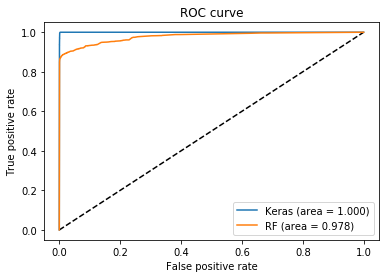

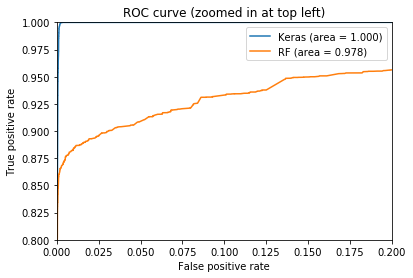

In [69]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()


# Quantum Computing Exploration with Strawberry Fields and QMLT

Please reach out to me directly for details. 

# Ensemble Methods


1. Stacking

In [ ]:
# Fit the best model to the test data
bestModel.fit(train_predictions, actualPrices)

model_final_test = pd.Series(
    bestModel.predict(test_predictions)).apply(np.exp)

model_final_train = pd.Series(
    bestModel.predict(train_predictions)).apply(np.exp)


2. Voting

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import numpy as np

clf1 = LogisticRegression(random_state=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()

print('5-fold cross validation:\n')

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes']

for clf, label in zip([clf1, clf2, clf3], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
          % (scores.mean(), scores.std(), label))


In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1,1,1])

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    scores = model_selection.cross_val_score(clf, X, y, 
                                              cv=5, 
                                              scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))
-------------------

In [ ]:
https://www.kaggle.com/vincentlugat/votingclassifier-f1-score-0-88-data-viz

In [ ]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1)
xgb_cfl.fit(x_train, y_train)  #fitting data


rf_cfl = RandomForestClassifier(n_jobs = -1,
                                random_state = 42)

rf_cfl.fit(x_train, y_train)    #fitting data


##voting classifier:
voting_cfl = VotingClassifier (
        estimators = [('xgb', xgb_cfl), ('lt', log_cfl), ('rf', rf_cfl)],
                     voting='soft', weights = [1, 1, 1.33])
    
voting_cfl.fit(x_train,y_train)   #FIT VOTING CLASSIFIER

y_pred = voting_cfl.predict(x_test)
y_score = voting_cfl.predict_proba(x_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names, 
                      title = 'VOTING Confusion matrix')
plt.savefig('1.voting_confusion_matrix.png')
plt.show()

show_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

# Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
plot_precision_recall()

fpr_voting, tpr_voting, t_voting = fpr, tpr, t
precision_voting, recall_voting, thresholds_voting = precision, recall, thresholds


3. Averaging

In [ ]:
#weighted average:


# Print ".csv" file (Optional Step)

In [14]:
# Make a list of test data IDs and Prices
#model_list = list(zip(range(1461, 2920), [model_final_test]))          #edit *   

# Create a dataframe
#model_df = pd.DataFrame(model_list, columns=[  ])                    #edit *

# Write to csv file named 'cc_ensemble_predictions.csv'
#model_df.to_csv('cc_ensemble_predictions.csv')                       #index=False in some cases

In [47]:
##notes for printing and stacking
sub_data <- data.frame(Id = test_labels, SalePrice = (pred_XGB+pred_lasso+pred_elnet)/3)
sub_data_XGB <- data.frame(Id = test_labels, SalePrice = pred_XGB)
sub_data_lasso <- data.frame(Id = test_labels, SalePrice = pred_lasso)
sub_data_ridge <- data.frame(Id = test_labels, SalePrice = pred_ridge)
sub_data_elnet <- data.frame(Id = test_labels, SalePrice = pred_elnet)

head(sub_data)
write.csv(sub_data, file = 'sub_data_2.csv', row.names = F)
write.csv(sub_data_lasso, file = 'sub_data_lasso.csv', row.names = F)
write.csv(sub_data_XGB, file = 'sub_data_xbg.csv', row.names = F)
write.csv(sub_data_ridge, file = 'sub_data_ridge.csv', row.names = F)
write.csv(sub_data_elnet, file = 'sub_data_elnet.csv', row.names = F)


SyntaxError: keyword can't be an expression (<ipython-input-47-0d94e93fc1b3>, line 9)